In [1]:
# Etapa 1 - Carregamento dos dados 

In [2]:
# Importação de bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_score
import joblib
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Carregamento de dataset
df = pd.read_csv("../data/Obesity.csv")

In [4]:
# Visualização dos dados carregados
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
# Etapa 2 - Análise dos dados

In [6]:
# Validação de quantidade de linhas e colunas respectivamente
df.shape

(2111, 17)

In [7]:
# Validação dos nomes das colunas
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'Obesity'],
      dtype='object')

In [8]:
# Validação dos tipos de colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

In [9]:
# Revisar estatística básica do dataset 
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [10]:
# Revisar valores únicos
df['Obesity'].value_counts()

Obesity
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [11]:
# Revisar valores únicos
df['Gender'].value_counts()

Gender
Male      1068
Female    1043
Name: count, dtype: int64

In [12]:
# Revisar valores únicos
df['family_history'].value_counts()

family_history
yes    1726
no      385
Name: count, dtype: int64

In [13]:
# Revisar valores únicos
df['CALC'].value_counts()

CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

In [14]:
#Validar valores nulos
df.isnull().sum()

Gender            0
Age               0
Height            0
Weight            0
family_history    0
FAVC              0
FCVC              0
NCP               0
CAEC              0
SMOKE             0
CH2O              0
SCC               0
FAF               0
TUE               0
CALC              0
MTRANS            0
Obesity           0
dtype: int64

In [15]:
#Revisar se existe valores decimais diferente do esperado
df[['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']].head()

,FCVC,NCP,CH2O,FAF,TUE
0,2.0,3.0,2.0,0.0,1.0
1,3.0,3.0,3.0,3.0,0.0
2,2.0,3.0,2.0,2.0,1.0
3,3.0,3.0,2.0,2.0,0.0
4,2.0,1.0,2.0,0.0,0.0


In [16]:
# Etapa 3 - Tratamento dos dados

In [17]:
#Criando cópia para não trabalhar direto no df original
df_tratado = df.copy()

In [18]:
#Padronizar nomes das colunas
df_tratado.columns = (
    df_tratado.columns
    .str.lower()
    .str.strip()
)

In [19]:
df_tratado.columns

Index(['gender', 'age', 'height', 'weight', 'family_history', 'favc', 'fcvc',
       'ncp', 'caec', 'smoke', 'ch2o', 'scc', 'faf', 'tue', 'calc', 'mtrans',
       'obesity'],
      dtype='object')

In [20]:
colunas_texto = df_tratado.select_dtypes(include='object').columns

for col in colunas_texto:
    df_tratado[col] = df_tratado[col].str.lower().str.strip()

In [21]:
#Arredondar colunas e transformá-las em int
colunas_arredondar = ['fcvc', 'ncp', 'ch2o', 'faf', 'tue']

for col in colunas_arredondar:
    df_tratado[col] = df_tratado[col].round().astype(int)

In [22]:
#Consulta para validar se tratamento funcionou corretamente
df_tratado[colunas_arredondar].head()

,fcvc,ncp,ch2o,faf,tue
0,2,3,2,0,1
1,3,3,3,3,0
2,2,3,2,2,1
3,3,3,2,2,0
4,2,1,2,0,0


In [23]:
#Realizar cálculo do IMC (base médica - IMC = (peso(kg)/Altura(m)²)
df_tratado['imc'] = df_tratado['weight'] / (df_tratado['height'] ** 2)
df_tratado['imc'] = df_tratado['imc'].round(2)

In [24]:
#Consulta resultado do IMC
df_tratado[['weight', 'height', 'imc']].head()

,weight,height,imc
0,64.0,1.62,24.39
1,56.0,1.52,24.24
2,77.0,1.80,23.77
3,87.0,1.80,26.85
4,89.8,1.78,28.34


In [25]:
#Classificação do IMC
def classificar_imc(imc):
    if imc < 18.5:
        return 'baixo_peso'
    elif imc < 25:
        return 'normal'
    elif imc < 30:
        return 'sobrepeso'
    else:
        return 'obesidade'

df_tratado['imc_categoria'] = df_tratado['imc'].apply(classificar_imc)

In [26]:
df_tratado['imc_categoria'].value_counts()

imc_categoria
obesidade     974
sobrepeso     566
normal        301
baixo_peso    270
Name: count, dtype: int64

In [27]:
#Renomear todas as colunas para o pt-br
mapa_colunas = {
    'gender': 'genero',
    'age': 'idade',
    'height': 'altura',
    'weight': 'peso',
    'family_history': 'historico_familiar',
    'favc': 'consumo_alimentos_caloricos',
    'fcvc': 'frequencia_consumo_vegetais',
    'ncp': 'numero_refeicoes_por_dia',
    'caec': 'consumo_entre_refeicoes',
    'smoke': 'fuma',
    'ch2o': 'consumo_diario_agua',
    'scc': 'monitoramento_calorias_diaria',
    'faf': 'frequencia_atividade_fisica_semanal',
    'tue': 'tempo_dispositivos_eletronicos',
    'calc': 'consumo_alcool',
    'mtrans': 'meio_transporte',
    'imc': 'imc',
    'imc_categoria': 'categoria_imc',
    'obesity': 'nivel_obesidade'
}

df_tratado.rename(columns=mapa_colunas, inplace=True)


In [28]:
#Tratamento de valores para pt-br
mapa_sim_nao = {
    'yes': 'sim',
    'no': 'nao'
}

df_tratado.replace(mapa_sim_nao, inplace=True)

In [29]:
df_tratado['consumo_entre_refeicoes'] = df_tratado['consumo_entre_refeicoes'].replace({
    'sometimes': 'as_vezes',
    'frequently': 'frequentemente',
    'always': 'sempre',
    'no': 'nao'
})

In [30]:
df_tratado['consumo_alcool'] = df_tratado['consumo_alcool'].replace({
    'sometimes': 'as_vezes',
    'frequently': 'frequentemente',
    'always': 'sempre',
    'no': 'nao'
})

In [31]:
df_tratado['meio_transporte'] = df_tratado['meio_transporte'].replace({
    'automobile': 'automovel',
    'motorbike': 'moto',
    'bike': 'bicicleta',
    'public_transportation': 'transporte_publico',
    'walking': 'a_pe'
})

In [32]:
df_tratado['genero'] = df_tratado['genero'].replace({
    'male': 'masculino',
    'female': 'feminino'
})

In [33]:
mapa_nivel_obesidade = {
    'insufficient_weight': 'abaixo_do_peso',
    'normal_weight': 'peso_normal',
    'overweight_level_i': 'sobrepeso_i',
    'overweight_level_ii': 'sobrepeso_ii',
    'obesity_type_i': 'obesidade_i',
    'obesity_type_ii': 'obesidade_ii',
    'obesity_type_iii': 'obesidade_iii'
}

In [34]:
df_tratado['nivel_obesidade'] = df_tratado['nivel_obesidade'].replace(mapa_nivel_obesidade)

In [35]:
df_tratado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   genero                               2111 non-null   object 
 1   idade                                2111 non-null   float64
 2   altura                               2111 non-null   float64
 3   peso                                 2111 non-null   float64
 4   historico_familiar                   2111 non-null   object 
 5   consumo_alimentos_caloricos          2111 non-null   object 
 6   frequencia_consumo_vegetais          2111 non-null   int64  
 7   numero_refeicoes_por_dia             2111 non-null   int64  
 8   consumo_entre_refeicoes              2111 non-null   object 
 9   fuma                                 2111 non-null   object 
 10  consumo_diario_agua                  2111 non-null   int64  
 11  monitoramento_calorias_diaria 

In [36]:
df_tratado.head()

,genero,idade,altura,peso,historico_familiar,consumo_alimentos_caloricos,frequencia_consumo_vegetais,numero_refeicoes_por_dia,consumo_entre_refeicoes,fuma,consumo_diario_agua,monitoramento_calorias_diaria,frequencia_atividade_fisica_semanal,tempo_dispositivos_eletronicos,consumo_alcool,meio_transporte,nivel_obesidade,imc,categoria_imc
0,feminino,21.0,1.62,64.0,sim,nao,2,3,as_vezes,nao,2,nao,0,1,nao,transporte_publico,peso_normal,24.39,normal
1,feminino,21.0,1.52,56.0,sim,nao,3,3,as_vezes,sim,3,sim,3,0,as_vezes,transporte_publico,peso_normal,24.24,normal
2,masculino,23.0,1.80,77.0,sim,nao,2,3,as_vezes,nao,2,nao,2,1,frequentemente,transporte_publico,peso_normal,23.77,normal
3,masculino,27.0,1.80,87.0,nao,nao,3,3,as_vezes,nao,2,nao,2,0,frequentemente,a_pe,sobrepeso_i,26.85,sobrepeso
4,masculino,22.0,1.78,89.8,nao,nao,2,1,as_vezes,nao,2,nao,0,0,as_vezes,transporte_publico,sobrepeso_ii,28.34,sobrepeso


In [37]:
df_tratado.isnull().sum()

genero                                 0
idade                                  0
altura                                 0
peso                                   0
historico_familiar                     0
consumo_alimentos_caloricos            0
frequencia_consumo_vegetais            0
numero_refeicoes_por_dia               0
consumo_entre_refeicoes                0
fuma                                   0
consumo_diario_agua                    0
monitoramento_calorias_diaria          0
frequencia_atividade_fisica_semanal    0
tempo_dispositivos_eletronicos         0
consumo_alcool                         0
meio_transporte                        0
nivel_obesidade                        0
imc                                    0
categoria_imc                          0
dtype: int64

In [38]:
# Etapa 4 - Preparação do dataset para validação de modelos de Machine Learning

In [39]:
y = df_tratado['nivel_obesidade']

In [40]:
#Definição variável X
X = df_tratado.drop(
    columns=['nivel_obesidade', 'categoria_imc']
)

In [41]:
X.dtypes

genero                                  object
idade                                  float64
altura                                 float64
peso                                   float64
historico_familiar                      object
consumo_alimentos_caloricos             object
frequencia_consumo_vegetais              int64
numero_refeicoes_por_dia                 int64
consumo_entre_refeicoes                 object
fuma                                    object
consumo_diario_agua                      int64
monitoramento_calorias_diaria           object
frequencia_atividade_fisica_semanal      int64
tempo_dispositivos_eletronicos           int64
consumo_alcool                          object
meio_transporte                         object
imc                                    float64
dtype: object

In [42]:
#Transformaçãao de variáveis categóricas em numéricas
X = pd.get_dummies(X, drop_first=True)

In [43]:
#Revisão se existe texto
X.select_dtypes(include='object').columns

Index([], dtype='object')

In [44]:
#Conferir dimensões finais
X.shape, y.shape

((2111, 24), (2111,))

In [45]:
# Etapa 5 - Treinamento de Machine Learning - Treino e Teste

In [46]:
#Divisão de dados de treino e teste baseado no 80% / 20% 
X_treino, X_teste, y_treino, y_teste = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y                    #utilizado para manter a proporção das classes.
)

In [47]:
#Confirmar qtd de registros para treino
X_treino.shape

(1688, 24)

In [48]:
#Confirmar qtd de registros para teste
X_teste.shape

(423, 24)

In [49]:
# Etapa 6 - Treinamento e validação dos modelos selecionados

# Utilizarei os modelos abaixo para validação: Regressão Logística, Ramdom Forest, XGBoost

In [50]:
scaler = StandardScaler()

X_treino_scaled = scaler.fit_transform(X_treino)
X_teste_scaled = scaler.transform(X_teste)

In [51]:
#Regressão Logística
modelo_lr = LogisticRegression(max_iter=1000)
modelo_lr.fit(X_treino_scaled, y_treino)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [52]:
pred_lr = modelo_lr.predict(X_teste_scaled)
acc_lr = accuracy_score(y_teste, pred_lr)

print("Regressão Logística")
print("Acurácia:", acc_lr)
print(classification_report(y_teste, pred_lr))

Regressão Logística
Acurácia: 0.9101654846335697
                precision    recall  f1-score   support

abaixo_do_peso       0.92      1.00      0.96        54
   obesidade_i       0.91      0.99      0.95        70
  obesidade_ii       0.98      0.93      0.96        60
 obesidade_iii       1.00      1.00      1.00        65
   peso_normal       0.89      0.81      0.85        58
   sobrepeso_i       0.79      0.78      0.78        58
  sobrepeso_ii       0.88      0.84      0.86        58

      accuracy                           0.91       423
     macro avg       0.91      0.91      0.91       423
  weighted avg       0.91      0.91      0.91       423



In [53]:
#Random Forest

modelo_rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)
modelo_rf.fit(X_treino, y_treino)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [54]:
pred_rf = modelo_rf.predict(X_teste)
acc_rf = accuracy_score(y_teste, pred_rf)

print("Random Forest")
print("Acurácia:", acc_rf)
print(classification_report(y_teste, pred_rf))

Random Forest
Acurácia: 0.9881796690307328
                precision    recall  f1-score   support

abaixo_do_peso       1.00      0.98      0.99        54
   obesidade_i       1.00      1.00      1.00        70
  obesidade_ii       1.00      1.00      1.00        60
 obesidade_iii       1.00      1.00      1.00        65
   peso_normal       0.95      0.98      0.97        58
   sobrepeso_i       0.97      0.97      0.97        58
  sobrepeso_ii       1.00      0.98      0.99        58

      accuracy                           0.99       423
     macro avg       0.99      0.99      0.99       423
  weighted avg       0.99      0.99      0.99       423



In [55]:
#XGBoost

In [56]:
#Antes de iniciar o modelo, iremos transformar os dados y uma vez que o campo de categorias clinicas é text ao invés de números.
le = LabelEncoder()
y_treino_xgb = le.fit_transform(y_treino)
y_teste_xgb = le.transform(y_teste)

In [57]:
modelo_xgb = XGBClassifier(
    objective='multi:softmax',
    num_class=len(le.classes_),
    eval_metric='mlogloss',
    random_state=42
)
modelo_xgb.fit(X_treino, y_treino_xgb)

,objective,'multi:softmax'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


In [58]:
pred_xgb = modelo_xgb.predict(X_teste)
pred_xgb_labels = le.inverse_transform(pred_xgb)

acc_xgb = accuracy_score(y_teste, pred_xgb_labels)

print("XGBoost")
print("Acurácia:", acc_xgb)
print(classification_report(y_teste, pred_xgb_labels))

XGBoost
Acurácia: 0.9858156028368794
                precision    recall  f1-score   support

abaixo_do_peso       0.98      1.00      0.99        54
   obesidade_i       1.00      1.00      1.00        70
  obesidade_ii       1.00      1.00      1.00        60
 obesidade_iii       1.00      1.00      1.00        65
   peso_normal       0.97      0.98      0.97        58
   sobrepeso_i       0.98      0.93      0.96        58
  sobrepeso_ii       0.97      0.98      0.97        58

      accuracy                           0.99       423
     macro avg       0.99      0.99      0.99       423
  weighted avg       0.99      0.99      0.99       423



In [59]:
#Comparação dos 3 modelos

comparacao_modelos = pd.DataFrame({
    'Modelo': ['Regressão Logística', 'Random Forest', 'XGBoost'],
    'Acurácia': [acc_lr, acc_rf, acc_xgb]
})

comparacao_modelos

,Modelo,Acurácia
0,Regressão Logística,0.910165
1,Random Forest,0.988180
2,XGBoost,0.985816


In [60]:
#Validação de Viés

In [61]:
#Validação removendo a coluna IMC

In [62]:
X_sem_imc = X.drop(columns=['imc'])

In [63]:
X_treino2, X_teste2, y_treino2, y_teste2 = train_test_split(
    X_sem_imc,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [64]:
modelo_rf2 = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

modelo_rf2.fit(X_treino2, y_treino2)
pred_rf2 = modelo_rf2.predict(X_teste2)

acc_rf2 = accuracy_score(y_teste2, pred_rf2)
acc_rf2


0.9408983451536643

In [65]:
#Validação Cruzada

In [66]:
rf_cv = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [67]:
scores = cross_val_score(
    rf_cv,
    X_sem_imc,
    y,
    cv=cv,
    scoring='accuracy'
)

In [68]:
scores
scores.mean(), scores.std()

(np.float64(0.9488375740871456), np.float64(0.006814853483344834))

In [69]:
#Realizei 2 validações de viés. A primeira removi o IMC onde no resultado trouxe uma diminuição de acuracidade mas seguiu na porcentagem esperada. Já a seguinda validação foi a validação cruzada que trouxe o mesmo resultado da validação anterior. Com base nisso, entende-se que o resultado adquirido nos 3 modelos estão corretos.

In [70]:
#Modelo escolhido - Random Forest sem a categoria_imc
modelo_final = modelo_rf

In [71]:
#Motivos: O modelo Random Forest foi selecionado por apresentar excelente desempenho, estabilidade e boa interpretabilidade, além de menor complexidade operacional para implantação.

In [72]:
cm = confusion_matrix(y_teste, pred_rf)

matriz_confusao = pd.DataFrame(
    cm,
    index=y.unique(),
    columns=y.unique()
)

matriz_confusao


,peso_normal,sobrepeso_i,sobrepeso_ii,obesidade_i,abaixo_do_peso,obesidade_ii,obesidade_iii
peso_normal,53,0,0,0,1,0,0
sobrepeso_i,0,70,0,0,0,0,0
sobrepeso_ii,0,0,60,0,0,0,0
obesidade_i,0,0,0,65,0,0,0
abaixo_do_peso,0,0,0,0,57,1,0
obesidade_ii,0,0,0,0,2,56,0
obesidade_iii,0,0,0,0,0,1,57


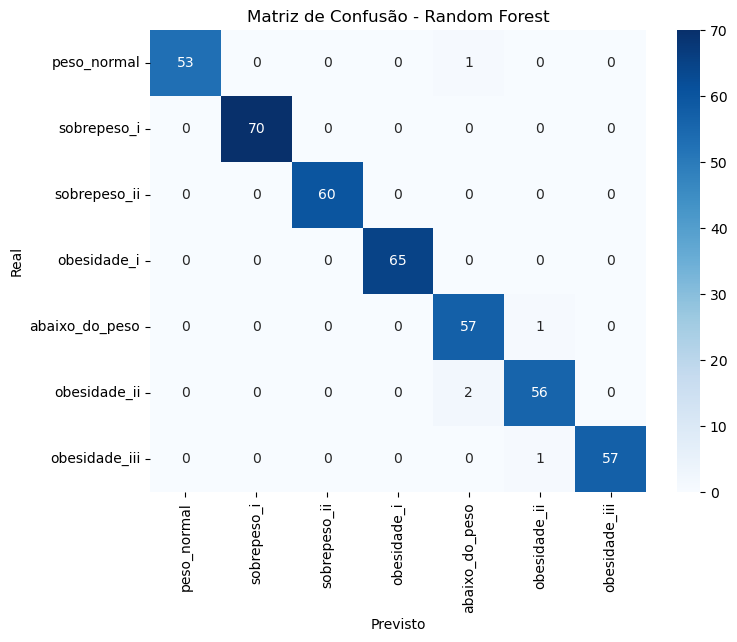

In [73]:
plt.figure(figsize=(8,6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Random Forest")
plt.show()


In [74]:
# Etapa 7 - Salvar o modelo para usar o Streamlit

In [75]:
joblib.dump(modelo_final, 'modelo_obesidade.pkl')

['modelo_obesidade.pkl']

In [76]:
X.columns.tolist()

['idade',
 'altura',
 'peso',
 'frequencia_consumo_vegetais',
 'numero_refeicoes_por_dia',
 'consumo_diario_agua',
 'frequencia_atividade_fisica_semanal',
 'tempo_dispositivos_eletronicos',
 'imc',
 'genero_masculino',
 'historico_familiar_sim',
 'consumo_alimentos_caloricos_sim',
 'consumo_entre_refeicoes_frequentemente',
 'consumo_entre_refeicoes_nao',
 'consumo_entre_refeicoes_sempre',
 'fuma_sim',
 'monitoramento_calorias_diaria_sim',
 'consumo_alcool_frequentemente',
 'consumo_alcool_nao',
 'consumo_alcool_sempre',
 'meio_transporte_automovel',
 'meio_transporte_bicicleta',
 'meio_transporte_moto',
 'meio_transporte_transporte_publico']